<a href="https://colab.research.google.com/github/hipswan/stockist/blob/master/stock_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install yfinance

  Created wheel for yfinance: filename=yfinance-0.1.54-py2.py3-none-any.whl size=22409 sha256=0ad09be879456aac1c521ab72c90675e332b4a3f6cdd902f0a174f193704e1c2
  Stored in directory: /root/.cache/pip/wheels/f9/e3/5b/ec24dd2984b12d61e0abf26289746c2436a0e7844f26f2515c
Successfully built yfinance


Long short-term memory (LSTM) is an artificial recurrent neural network (RNN) architecture used in the field of deep learning. Unlike standard feed forward neural networks, LSTM has feedback connections. It can not only process single data points (such as images), but also entire sequences of data (such as speech or video). — Wikipedia

LSTMs are widely used for sequence prediction problems and have proven to be extremely effective.The reason they work so well is because LSTM is able to store past information that is important, and forget the information that is not. -Stackabuse.com

Common Architecture of LSTM:
Forget Gate
Input Gate
Output Gate

In [ ]:
#Import the libraries
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
import yfinance as yf

plt.style.use('fivethirtyeight')

/usr/local/lib/python3.6/dist-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [ ]:
data = yf.download("IRCTC.NS Relaxo.NS ASIANPAINT.NS Idea.NS", period = "max",interval='1d',group_by='IRCTC.NS')
tickers=yf.Tickers(["IRCTC.NS","Relaxo.NS"])

[*********************100%***********************]  4 of 4 completed


In [ ]:
tickers.history()

[*********************100%***********************]  2 of 2 completed


AttributeError: ignored

In [ ]:
stocks = []
for (columnname,columndata) in data.iteritems():

  if(not stocks.count(columnname[0]) > 0): 
    stocks.append(columnname[0])
  # print('Column name {}'.format(columnname[0]))
  # print('Column data {}'.format(columndata))



In [ ]:
stocks

['RELAXO.NS', 'IDEA.NS', 'IRCTC.NS', 'ASIANPAINT.NS']

In [ ]:
idea = yf.Ticker('Relaxo.NS')
idea.actions
idea.history()


,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2020-07-06,662.80,675.00,647.40,654.85,849901,0,0
2020-07-07,655.00,664.00,648.65,650.25,364189,0,0
2020-07-08,654.90,656.85,641.00,645.55,234292,0,0
2020-07-09,650.90,650.90,638.20,643.00,271585,0,0
2020-07-10,640.00,643.00,633.00,635.55,187160,0,0
2020-07-13,638.60,641.00,622.00,625.85,322579,0,0
2020-07-14,625.00,633.80,618.20,620.35,230548,0,0
2020-07-15,624.95,626.50,619.00,621.60,246679,0,0
2020-07-16,624.90,625.35,610.00,622.35,234192,0,0


In [ ]:
# for stock in stocks:
#   df = data[stock]
#   df.dropna()
df=data['RELAXO.NS']
df=df.dropna()
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2011-06-17,14.995000,14.995000,13.150000,14.177500,11.839322,317040.0
2011-06-20,13.600000,13.600000,13.102500,13.115000,10.952052,10080.0
2011-06-21,12.900000,13.235000,12.505000,12.875000,10.751634,7980.0
2011-06-22,11.600000,13.397500,11.600000,12.252500,10.231797,180.0
2011-06-23,12.002500,12.950000,12.002500,12.500000,10.438479,1900.0
...,...,...,...,...,...,...
2020-07-29,600.000000,612.650024,599.500000,601.349976,601.349976,307316.0
2020-07-30,610.000000,610.000000,587.099976,590.849976,590.849976,391694.0
2020-07-31,595.049988,603.900024,578.000000,595.200012,595.200012,593561.0


In [ ]:
# hdfc = yf.Ticker('Relaxo.NS')
# hdfc_2020= hdfc.history(start='2020-01-01' , end='2020-08-07')
# hdfc = hdfc.history(period='max',interval='1d')
# # print('{}'.format(hdfc.actions)
# df=hdfc
# df.shape

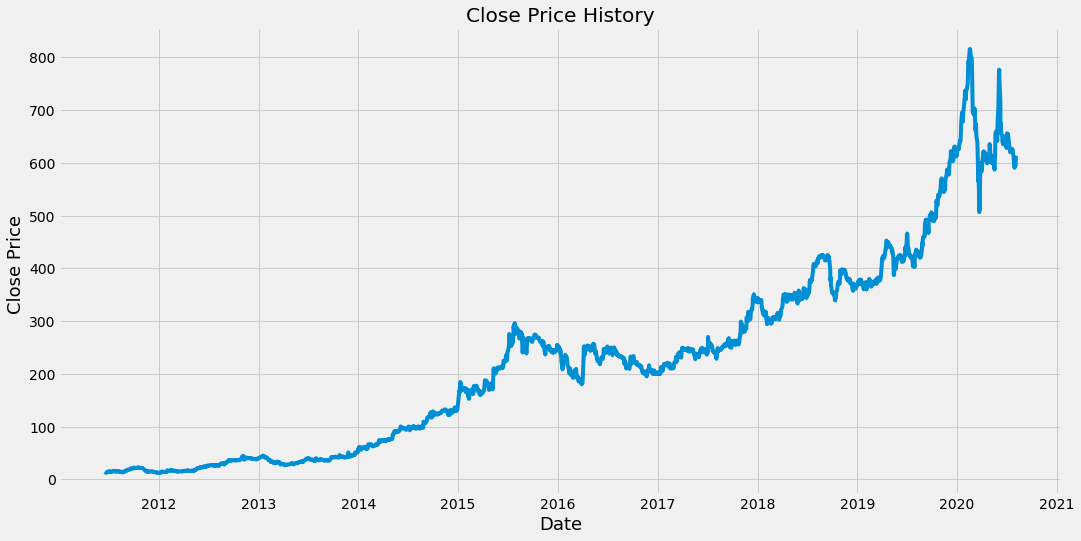

In [ ]:
#Visualize the closing price history
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price ',fontsize=18)
plt.show()

In [ ]:
#Create a new dataframe with only the 'Close' column
data = df.filter(['Close'])
#Converting the dataframe to a numpy array
dataset = data.values
#Get /Compute the number of rows to train the model on
training_data_len = math.ceil( len(dataset) *.8)

In [ ]:
#Scale the all of the data to be values between 0 and 1 
scaler = MinMaxScaler(feature_range=(0, 1)) 
scaled_data = scaler.fit_transform(dataset)


In [ ]:
#Create the scaled training data set 
train_data = scaled_data[0:training_data_len  , : ]
#Split the data into x_train and y_train data sets
x_train=[]
y_train = []
for i in range(60,len(train_data)):
    x_train.append(train_data[i-60:i,0])
    y_train.append(train_data[i,0])

In [ ]:
x_train = np.array(x_train)
y_train = np.array(y_train)

In [ ]:
x_train[-60:]

array([[0.42108076, 0.42219956, 0.41993089, ..., 0.41613936, 0.42275897,
        0.42129829],
       [0.42219956, 0.41993089, 0.42092537, ..., 0.42275897, 0.42129829,
        0.42269679],
       [0.41993089, 0.42092537, 0.4050135 , ..., 0.42129829, 0.42269679,
        0.42294543],
       ...,
       [0.41613936, 0.42275897, 0.42129829, ..., 0.45455165, 0.46039431,
        0.44118815],
       [0.42275897, 0.42129829, 0.42269679, ..., 0.46039431, 0.44118815,
        0.44000721],
       [0.42129829, 0.42269679, 0.42294543, ..., 0.44118815, 0.44000721,
        0.42512089]])

Reshape the data to be 3-dimensional in the form [number of samples, number of time steps, and number of features]. The LSTM model is expecting a 3-dimensional data set.

In [ ]:
#Reshape the data into the shape accepted by the LSTM
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

In [ ]:
#Build the LSTM network model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dense(units=79))
model.add(Dense(units=56))
model.add(Dense(units=1))

In [ ]:
#Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
#Train the model

model.fit(x_train, y_train, batch_size=1, epochs=22)

Epoch 1/22
1736/1736 [==============================] - 40s 23ms/step - loss: 4.4145e-05
Epoch 2/22
1736/1736 [==============================] - 39s 23ms/step - loss: 4.0834e-05
Epoch 3/22
1736/1736 [==============================] - 39s 22ms/step - loss: 4.6338e-05
Epoch 4/22
1736/1736 [==============================] - 39s 23ms/step - loss: 4.4681e-05
Epoch 5/22
1736/1736 [==============================] - 39s 22ms/step - loss: 4.1186e-05
Epoch 6/22
1736/1736 [==============================] - 39s 23ms/step - loss: 4.4451e-05
Epoch 7/22
1736/1736 [==============================] - 39s 23ms/step - loss: 4.4182e-05
Epoch 8/22
1736/1736 [==============================] - 39s 23ms/step - loss: 4.1066e-05
Epoch 9/22
1736/1736 [==============================] - 40s 23ms/step - loss: 4.7038e-05
Epoch 10/22
1736/1736 [==============================] - 39s 23ms/step - loss: 4.3221e-05
Epoch 11/22
1736/1736 [==============================] - 39s 22ms/step - loss: 4.2440e-05
Epoch 12/22
1736/17

In [ ]:
test_data = scaled_data[training_data_len - 60: , : ]
print(test_data.shape)
#Create the x_test and y_test data sets
x_test = []
y_test =  dataset[training_data_len : , : ] #Get all of the rows from index 1603 to the rest and all of the columns (in this case it's only column 'Close'), so 2003 - 1603 = 400 rows of data
for i in range(60,len(test_data)):
    x_test.append(test_data[i-60:i,0])

(508, 1)


In [ ]:
test_data = scaled_data[: , : ]
print(test_data.shape)
#Create the x_test and y_test data sets
x_test = []
y_test =  dataset[60 : , : ] #Get all of the rows from index 1603 to the rest and all of the columns (in this case it's only column 'Close'), so 2003 - 1603 = 400 rows of data
for i in range(60,len(test_data)):
    x_test.append(test_data[i-60:i,0])

(2244, 1)


In [ ]:
x_test = np.array(x_test)

In [ ]:
#Reshape the data into the shape accepted by the LSTM
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))

In [ ]:
#Getting the models predicted price values
predictions = model.predict(x_test) 
predictions = scaler.inverse_transform(predictions)#Undo scaling

In [ ]:
#Calculate/Get the value of RMSE
rmse=np.sqrt(np.mean(((predictions- y_test)**2)))
rmse

7.569879643474957

In [ ]:
predictions.shape

(2184, 1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


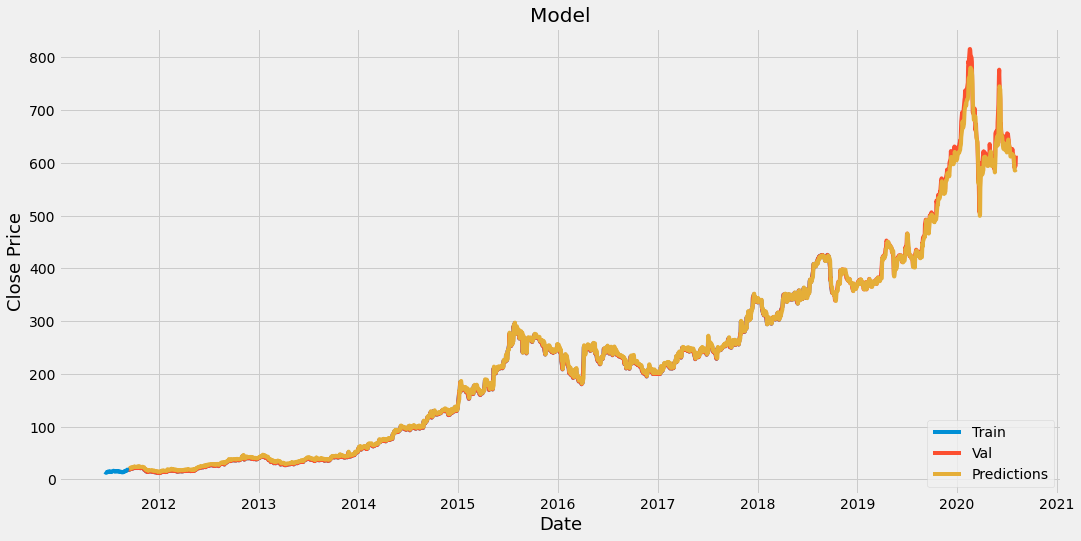

In [ ]:
train = data[:training_data_len]
valid = data[60:]
valid['Predictions'] = predictions
#Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')

plt.show()

In [ ]:
predictions = np.array(predictions)
# predictions.strides
# predictions[1,0]
# offset=sum(predictions.strides*np.array((1,0)))
# offset/predictions.itemsize

In [ ]:
valid[['Close','Predictions']]

,Close,Predictions
Date,,
2011-09-14,18.377501,20.284182
2011-09-15,18.157499,20.481281
2011-09-16,18.264999,20.295353
2011-09-19,20.372499,20.414766
2011-09-20,20.497499,22.338408
...,...,...
2020-07-29,601.349976,593.368408
2020-07-30,590.849976,592.184509
2020-07-31,595.200012,585.572205


In [ ]:
# close = valid.filter(['Close']).values
# predictions = valid.filter(['Predictions']).values
# avg = (close-predictions)/2
# std = np.std((close-predictions),axis=1).reshape(predictions.shape)
# valid['Predictions'] = (predictions+avg+2*std)
# predictions = (predictions+avg+2*std)

In [ ]:
# rmse=np.sqrt(np.mean(((predictions- y_test)**2)))
# rmse

In [ ]:
# close = valid.filter(['Close']).values
# predictions = valid.filter(['Predictions']).values
# avg = np.average((close-predictions),axis=0)
# std = np.std((close-predictions),axis=0)
# valid['Predictions'] = (predictions+avg+2*std)
# predictions = (predictions+avg+2*std)

In [ ]:
# rmse=np.sqrt(np.mean(((predictions- y_test)**2)))
# rmse

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


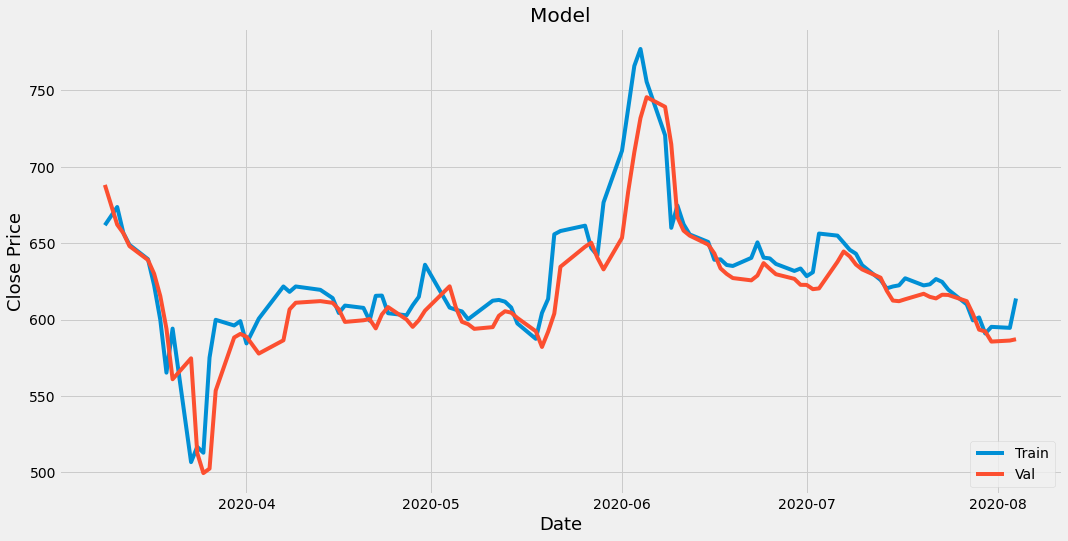

In [ ]:
valid['Predictions'] = predictions
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price', fontsize=18)
# plt.plot(train['Close'])
plt.plot(valid[-100:][['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [ ]:
# new_df=df.filter(['Close'])
# print(new_df.head(10))
# stock={}
# date = new_df.last_valid_index()
# next_date = date+ pd.DateOffset(1)
# if(next_date.weekday()==5 or next_date.weekday() == 6):
#     print('its weekend take rest')
# stock['Date'] = next_date
# stock['Close'] = [457]
# ha= pd.DataFrame(stock)
# new_df.append(ha.set_index('Date'))


In [ ]:
# value=[]
# ha= np.array([[456]])
# ha.data
# value.append(ha[0][0])
# value

In [ ]:
new_df=df.filter(['Close'])
new_df[-10:]

,Close
Date,
2020-07-22,626.450012
2020-07-23,624.599976
2020-07-24,619.500000
2020-07-27,609.900024
2020-07-28,599.450012
2020-07-29,601.349976
2020-07-30,590.849976
2020-07-31,595.200012
2020-08-03,594.549988


In [ ]:
for i in range(0,60):
  #take last 60 days data 
  last_60_days = new_df[-60:].values
  #note down last date
  last_day_date= new_df.last_valid_index() 
  #take next date tosave prediction against 
  next_date = last_day_date + pd.DateOffset(1)
  if(next_date.weekday()==  5):
    next_date = next_date+pd.DateOffset(2)
  if(next_date.weekday() == 6):
    next_date = next_date+pd.DateOffset(1)

  last_60_days_scaled = scaler.transform(last_60_days)
  #Create an empty list
  X_test = []
  #Append teh past 60 days
  X_test.append(last_60_days_scaled)
  #Convert the X_test data set to a numpy array
  X_test = np.array(X_test)
  #Reshape the data
  X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
  #Get the predicted scaled price
  pred_price = model.predict(X_test)
  #undo the scaling 
  pred_price = scaler.inverse_transform(pred_price)
  #append predicted data to the original
  future_data={}
  future_data['Date'] = next_date
  future_data['Close'] = pred_price[0]
  ha= pd.DataFrame(future_data)
  ha.set_index('Date',inplace="true")
  new_df=new_df.append(ha)

In [ ]:
new_df[-60:]

,Close
Date,
2020-08-05,600.876343
2020-08-06,596.977722
2020-08-07,590.120667
2020-08-10,583.500610
2020-08-11,577.156433
2020-08-12,571.060974
2020-08-13,565.166748
2020-08-14,559.424194
2020-08-17,553.798157


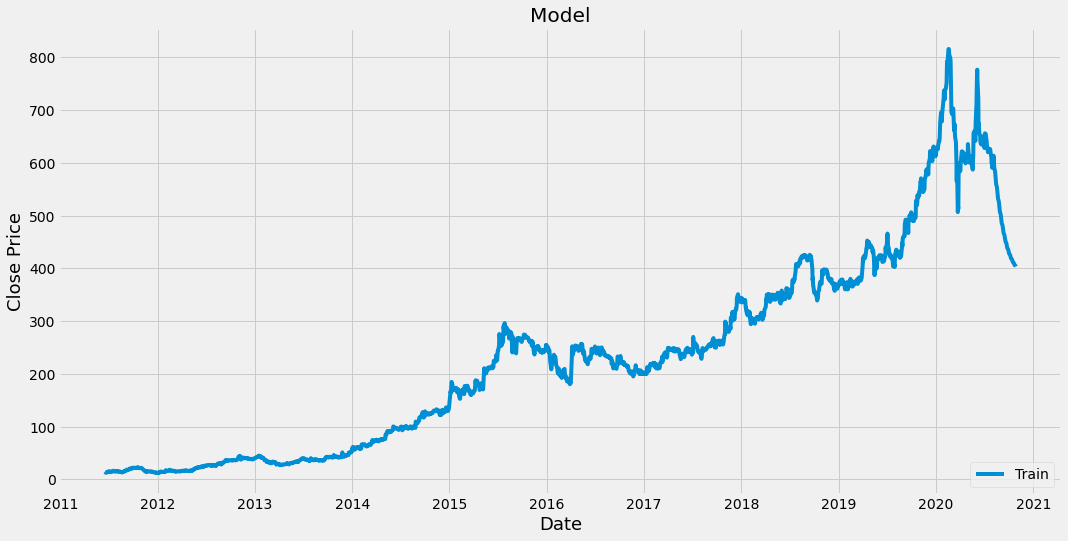

In [ ]:
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price', fontsize=18)
# plt.plot(train['Close'])
plt.plot(new_df[['Close']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [ ]:
#Create a new dataframe
new_df = df.filter(['Close'])
#Get teh last 60 day closing price 
last_60_days = new_df[-60:].values
#Scale the data to be values between 0 and 1
last_60_days_scaled = scaler.transform(last_60_days)
#Reshape the data
X_test = np.reshape(last_60_days_scaled, (X_test.shape[0], X_test.shape[1], 1))
#Get the predicted scaled price
pred_price = model.predict(X_test)
#undo the scaling 
pred_price = scaler.inverse_transform(pred_price)
pred_price

array([[600.87634]], dtype=float32)

In [ ]:
#Get the quote

#Create a new dataframe
new_df = df.filter(['Close'])
#Get teh last 60 day closing price 
last_60_days = new_df[-60:].values
#Scale the data to be values between 0 and 1
last_60_days_scaled = scaler.transform(last_60_days)
#Create an empty list
X_test = []
#Append teh past 60 days
X_test.append(last_60_days_scaled)
#Convert the X_test data set to a numpy array
X_test = np.array(X_test)
#Reshape the data
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
#Get the predicted scaled price
pred_price = model.predict(X_test)
#undo the scaling 
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)
pred_price+avg+2*std

[[580.2744]]


NameError: ignored